Rong Wang, rongwww, 1619779944

<b>1. Time Series Classification Part 1: Feature Creation/Extraction</b>

An interesting task in machine learning is classification of time series. In this problem, we will classify the activities of humans based on time series obtained by a Wireless Sensor Network.

(a) Download the AReM data from: https://archive.ics.uci.edu/ml/datasets/ Activity+Recognition+system+based+on+Multisensor+data+fusion+\%28AReM\ %29 . The dataset contains 7 folders that represent seven types of activities. In each folder, there are multiple files each of which represents an instant of a human performing an activity.1 Each file containis 6 time series collected from activities
of the same person, which are called avg rss12, var rss12, avg rss13, var rss13, vg rss23, and ar rss23. There are 88 instances in the dataset, each of which con- tains 6 time series and each time series has 480 consecutive values.

(b) Keep datasets 1 and 2 in folders bending1 and bending 2, as well as datasets 1, 2, and 3 in other folders as test data and other datasets as train data.

In [123]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import collections
from astropy.stats import bootstrap
import statistics
from numpy import mean
from numpy import median
from numpy import percentile
import scipy as sp
import scipy.stats

import warnings
warnings.filterwarnings('ignore')

In [124]:
dir_path = '../data/AReM/'
folders = ['bending1', 'bending2', 'cycling', 'lying', 'sitting', 'standing', 'walking']
col_name = ['time', 'avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23', 'var_rss23']
# 69 train datasets
traindata_path_num = [[3, 4, 5, 6, 7], 
                      [3, 4, 5, 6], 
                      [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
                      [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
                      [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
                      [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
                      [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]]
# 19 test datasets
testdata_path_num = [[1, 2], [1, 2], [1, 2, 3], [1, 2, 3], [1, 2, 3], [1, 2, 3], [1, 2, 3]]

trainset, testset = [], []

# train data
for folder_num in range(len(folders)):
    folder_name = folders[folder_num]
    dataset_num = traindata_path_num[folder_num]
    for i in dataset_num:
        file_path = dir_path + folder_name + "/" + "dataset" + str(i) + ".csv"
        if file_path == '../data/AReM/bending2/dataset4.csv':
            dataframe = pd.read_csv(file_path, skiprows=5, header=None, delim_whitespace=True, names=col_name)
        else:
            dataframe = pd.read_csv(file_path, skiprows=5, encoding='utf-8', names=col_name)
        trainset.append(dataframe)
#         print(file_path + " size: " + str(dataframe.shape))
    
# test data
for folder_num in range(len(folders)):
    folder_name = folders[folder_num]
    dataset_num = testdata_path_num[folder_num]
    for i in dataset_num:
        file_path = dir_path + folder_name + "/" + "dataset" + str(i) + ".csv"
        dataframe = pd.read_csv(file_path, skiprows=5, encoding='utf-8', names=col_name)
        testset.append(dataframe)
#         print(file_path + " size: " + str(dataframe.shape))          
            
print("trainset size: " + str(len(trainset)) + " lines " + str(trainset[0].shape))
print("testset size: " + str(len(testset)) + " lines " + str(testset[0].shape))          

trainset size: 69 lines (480, 7)
testset size: 19 lines (480, 7)


(c) Feature Extraction
Classification of time series usually needs extracting features from them. In this problem, we focus on time-domain features.

i. Research what types of time-domain features are usually used in time series classification and list them (examples are minimum, maximum, mean, etc).

minimum, maximum, mean, median, standard deviation, first quartile, third quartile, range, skewness, kurtosis.

ii. Extract the time-domain features minimum, maximum, mean, median, stan- dard deviation, first quartile, and third quartile for all of the 6 time series in each instance. You are free to normalize/standardize features or use them directly.

For example, 1st quart6, means the first quartile of the sixth time series in each of the 88 instances.

In [125]:
# features = ['min', 'max', 'mean', 'median', 'std', '1st_quart', '3rd_quart']
stat = collections.defaultdict(dict)
ind = 0
for datafile in trainset+testset: # one datafile is one instance, is one dataset file.
    ind += 1
    for i, time_series_col in enumerate(col_name[1:]): # ['avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23', 'var_rss23']
        series_data = datafile[time_series_col].describe()
        series_num = i+1
        stat[ind]['min' + str(series_num)] = series_data['min']
        stat[ind]['max' + str(series_num)] = series_data['max']
        stat[ind]['mean' + str(series_num)] = series_data['mean']
        stat[ind]['median' + str(series_num)] = series_data['50%']
        stat[ind]['std' + str(series_num)] = series_data['std']
        stat[ind]['1st_quartile' + str(series_num)] = series_data['25%']
        stat[ind]['3rd_quartile' + str(series_num)] = series_data['75%']
stat_table = pd.DataFrame(stat).T
stat_table # first 69 lines are for trainset, last 19 lines are for testset.

,min1,max1,mean1,median1,std1,1st_quartile1,3rd_quartile1,min2,max2,mean2,...,std5,1st_quartile5,3rd_quartile5,min6,max6,mean6,median6,std6,1st_quartile6,3rd_quartile6
1,35.00,47.40,43.954500,44.330,1.558835,43.00,45.0000,0.0,1.70,0.426250,...,1.999604,35.3625,36.500,0.0,1.79,0.493292,0.430,0.513506,0.000,0.940
2,33.00,47.75,42.179813,43.500,3.670666,39.15,45.0000,0.0,3.00,0.696042,...,3.849448,30.4575,36.330,0.0,2.18,0.613521,0.500,0.524317,0.000,1.000
3,33.00,45.75,41.678063,41.750,2.243490,41.33,42.7500,0.0,2.83,0.535979,...,2.411026,28.4575,31.250,0.0,1.79,0.383292,0.430,0.389164,0.000,0.500
4,37.00,48.00,43.454958,43.250,1.386098,42.50,45.0000,0.0,1.58,0.378083,...,2.488862,22.2500,24.000,0.0,5.26,0.679646,0.500,0.622534,0.430,0.870
5,36.25,48.00,43.969125,44.500,1.618364,43.31,44.6700,0.0,1.50,0.413125,...,3.318301,20.5000,23.750,0.0,2.96,0.555313,0.490,0.487826,0.000,0.830
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,35.50,46.25,43.174938,43.670,1.989052,42.50,44.5000,0.0,2.12,0.506583,...,2.983976,12.7500,16.500,0.0,5.72,0.911979,0.830,0.666161,0.470,1.220
85,32.75,47.00,42.760563,44.500,3.398919,41.33,45.3725,0.0,3.34,0.486167,...,4.296574,13.0000,18.565,0.0,5.73,0.842271,0.710,0.722165,0.430,1.090
86,19.33,43.50,34.227771,35.500,4.889576,30.50,37.7500,0.0,14.50,3.995729,...,3.092094,14.7500,18.670,0.0,9.74,3.394125,3.100,1.792090,2.105,4.425
87,12.50,45.00,33.509729,34.125,4.850923,30.50,36.7500,0.0,13.05,4.450771,...,3.133564,14.6275,18.750,0.0,8.96,3.378479,3.085,1.787360,2.060,4.440


iii. Estimate the standard deviation of each of the time-domain features you extracted from the data. Then, use Python’s bootstrapped or any other method to build a 90% bootsrap confidence interval for the standard deviation of each feature.

In [126]:
# st_dev=np.std(stat_table) 
# print(st_dev)

std_stat = collections.defaultdict(dict)
for feature in stat_table.columns:
    std_stat[feature]["standard_deviation"] = np.std(stat_table[feature])
#     print('The standard deviation of ' + feature + ' is ' + str(np.std(stat_table[feature])))
    feature_array = np.array(stat_table[feature])
    n = len(feature_array)
    bootstrap = []
    for i in range(1000):
        ind = np.random.randint(0, n, size=n)
        data_sample = feature_array[ind]
        bootstrap.append(np.std(data_sample))
    bootstrap.sort()
    a = 1 - 0.9
    std_stat[feature]["90%_bootstrap_confidence_interval"] = '[' + str(bootstrap[int(1000 * a / 2)]) + ', ' + str(bootstrap[int(1000 * (1 - a / 2))]) + ']'
#     print('90% bootstrap confidence interval is: [' + str(bootstrap[int(1000 * a / 2)]) + ', ' + str(bootstrap[int(1000 * (1 - a / 2))]) + ']')
std_stat_table = pd.DataFrame(std_stat).T
std_stat_table

,standard_deviation,90%_bootstrap_confidence_interval
min1,9.515445,"[8.192891859072889, 10.78087416760187]"
max1,4.369322,"[3.3387936407041705, 5.254423784323891]"
mean1,5.305314,"[4.693905049425178, 5.864276232163162]"
median1,5.409056,"[4.821761708443436, 5.944075321490873]"
std1,1.762056,"[1.5513561078651208, 1.9362730462996591]"
1st_quartile1,6.118526,"[5.555771258740063, 6.627447231847126]"
3rd_quartile1,5.109643,"[4.3084182323077895, 5.795682117788488]"
min2,0.0,"[0.0, 0.0]"
max2,5.033882,"[4.599628331194159, 5.373081009544149]"
mean2,1.565194,"[1.3848779136053402, 1.6954394708303846]"


iv. Use your judgement to select the three most important time-domain features (one option may be min, mean, and max).

1. Mean: to capture the average values of the time series
2. Min: to see lowest bound values of the series
3. Max: to utilise the peak values of the time series

<b>2. ISLR 3.7.4</b>

I collect a set of data (n = 100 observations) containing a single predictor and a quantitative response. I then fit a linear regression model to the data, as well as a separate cubic regression, i.e. Y = β0 +β1X +β2X2 +β3X3 +ε.

(a) Suppose that the true relationship between X and Y is linear, i.e. Y = β0 + β1X + ε. Consider the training residual sum of squares (RSS) for the linear regression, and also the training RSS for the cubic regression. Would we expect one to be lower than the other, would we expect them to be the same, or is there not enough information to tell? Justify your answer.

Cubic regression is better. Because cubic regression is more flexible than linear model, when it only has 100 obseavations, cubic regression will get a good fitting than linear regression. When we use polynomial features, we get more parameters, and the generated curve will try to fit more data points than a linear line.

(b) Answer (a) using test rather than training RSS.

I would expect the linear regression to perform slightly better than the cubic regression. We may have overfitting training on 100 observations, so cubic regression may be less accurate when it predicts the unseen data.

(c) Suppose that the true relationship between X and Y is not linear, but we don’t know how far it is from linear. Consider the training RSS for the linear regression, and also the training RSS for the cubic regression. Would we expect one to be lower than the other, would we expect them to be the same, or is there not enough information to tell? Justify your answer.

Cubic regression will has a lower training RSS. Since we don't know how far it is from line, so here more parameters mean the regression model will be more flwxible, is able to fit more data points.

(d) Answer (c) using test rather than training RSS.

I think it would depends on the real relationship between X and Y. If it is a strong non-linear relationship, then we would obviously expect the cubic regression to have a lower test RSS. But if it is close to linear, or maybe a mildly non-linear relationship, linear model may perform better. 

<b>HW4</b>

<b>Time Series Classification Part 2: Binary and Multiclass Classification</b>


<b>(a) Binary Classification Using Logistic Regression3</b>


i. Assume that you want to use the training set to classify bending from other activities, i.e. you have a binary classification problem. Depict scatter plots of the features you specified in 1(c)iv extracted from time series 1, 2, and 6 of each instance, and use color to distinguish bending vs. other activities. (See p. 129 of the textbook).4

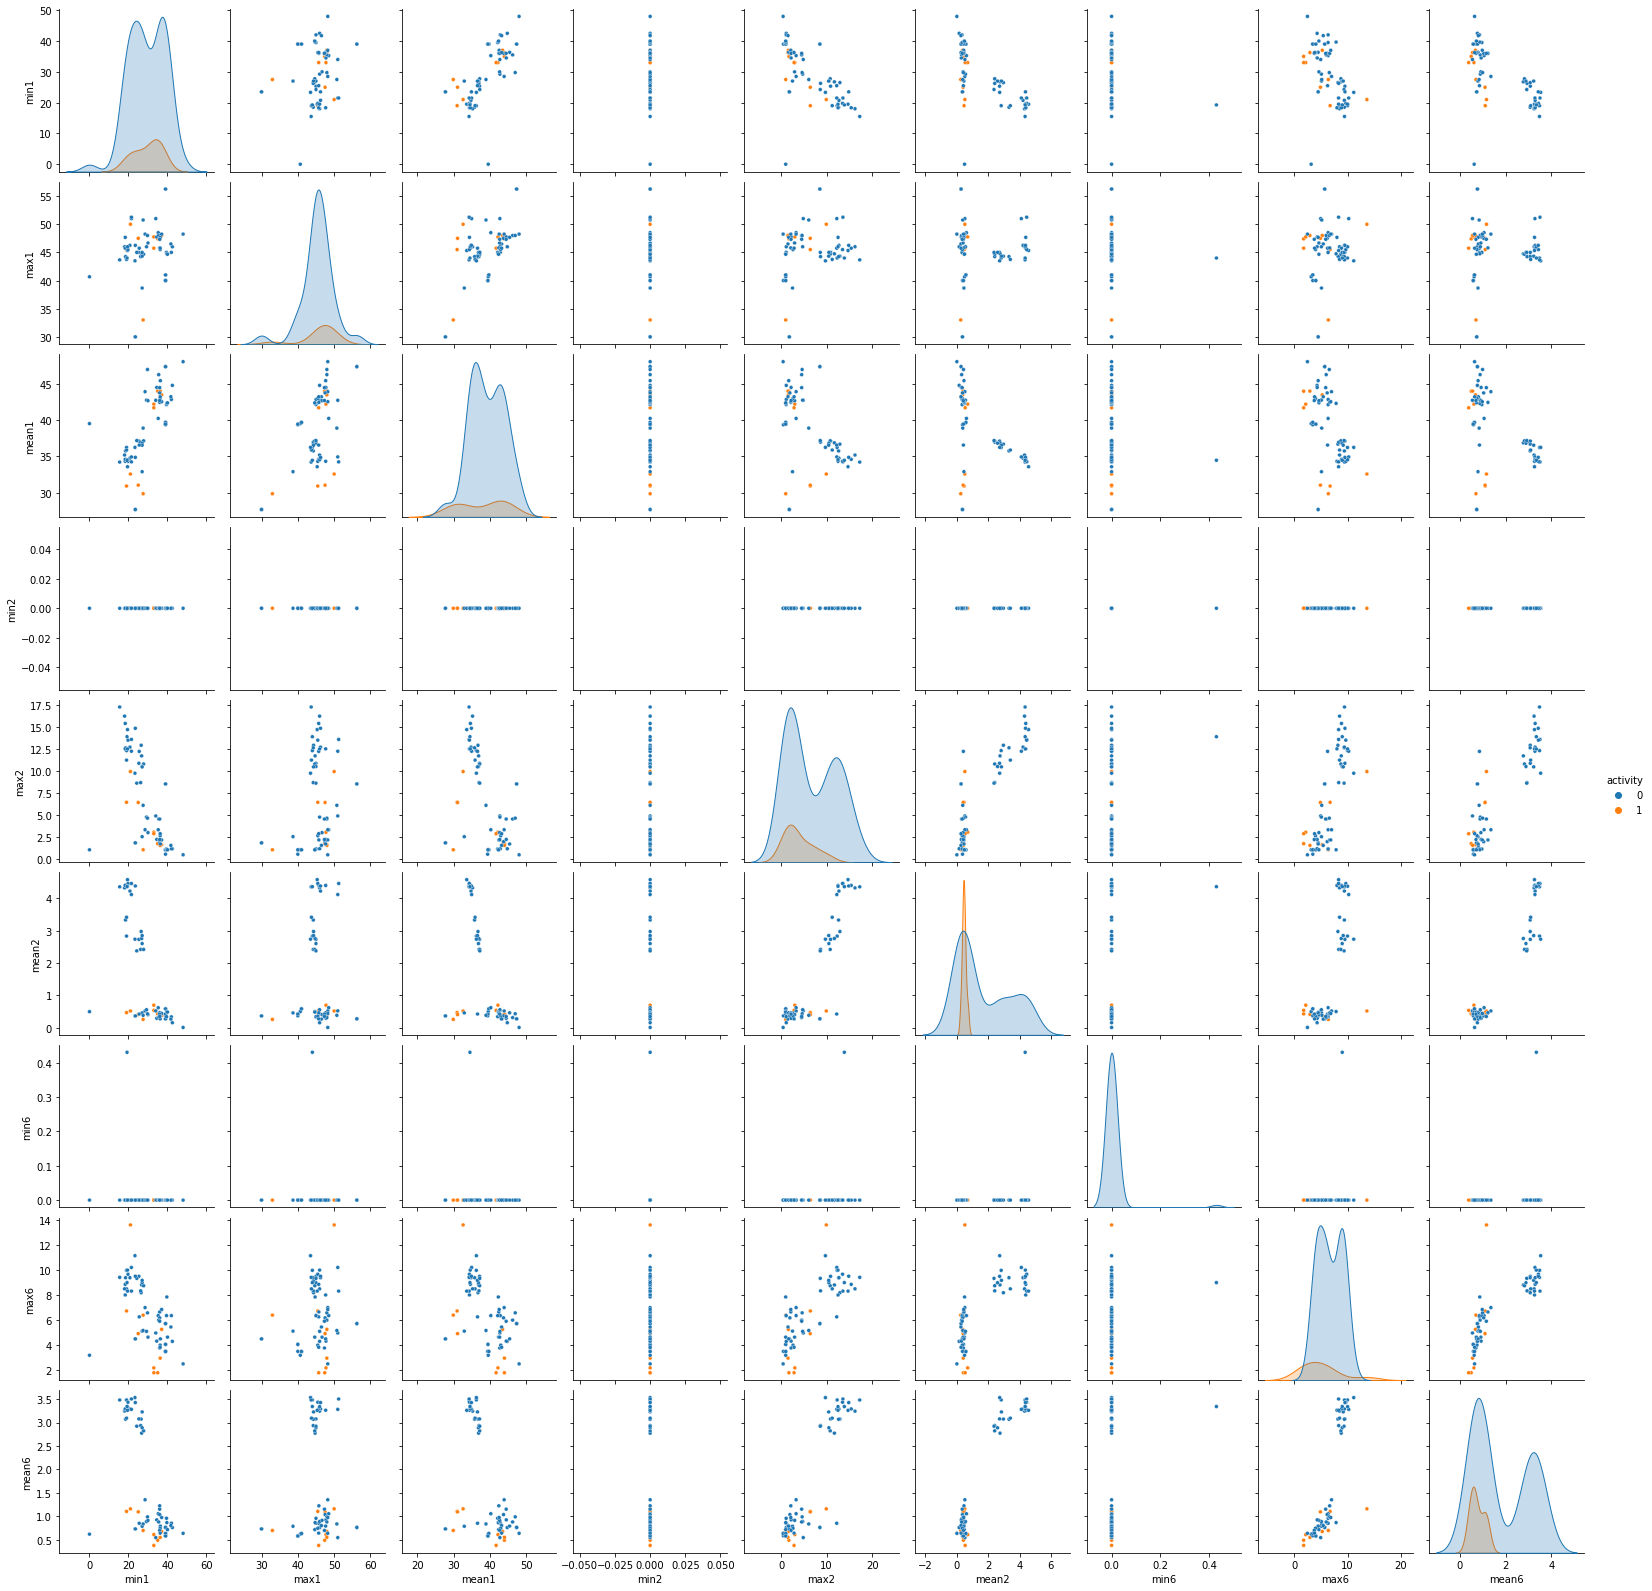

In [127]:
stat_4a = collections.defaultdict(list)
stat_4a["activity"] = [1] * 9 + [0] * 60 # first 5 are bending 1, next 4 are bending 2, the rest are other activity
for i in range(1, 70):
    stat_4a["min1"].append(stat[i]["min1"])
    stat_4a["max1"].append(stat[i]["max1"])
    stat_4a["mean1"].append(stat[i]["mean1"])
    stat_4a["min2"].append(stat[i]["min2"])
    stat_4a["max2"].append(stat[i]["max2"])
    stat_4a["mean2"].append(stat[i]["mean2"])
    stat_4a["min6"].append(stat[i]["min6"])
    stat_4a["max6"].append(stat[i]["max6"])
    stat_4a["mean6"].append(stat[i]["mean6"])
df_4a = pd.DataFrame(stat_4a)
# class tag is Activity, point size is 15
graph_4a = sns.pairplot(df_4a, hue='activity', plot_kws={'s':15})

ii. Break each time series in your training set into two (approximately) equal length time series. Now instead of 6 time series for each of the training instances, you have 12 time series for each training instance. Repeat the experiment in 2(a)i, i.e depict scatter plots of the features extracted from both parts of the time series 1,2, and 6. Do you see any considerable difference in the results with those of 2(a)i?

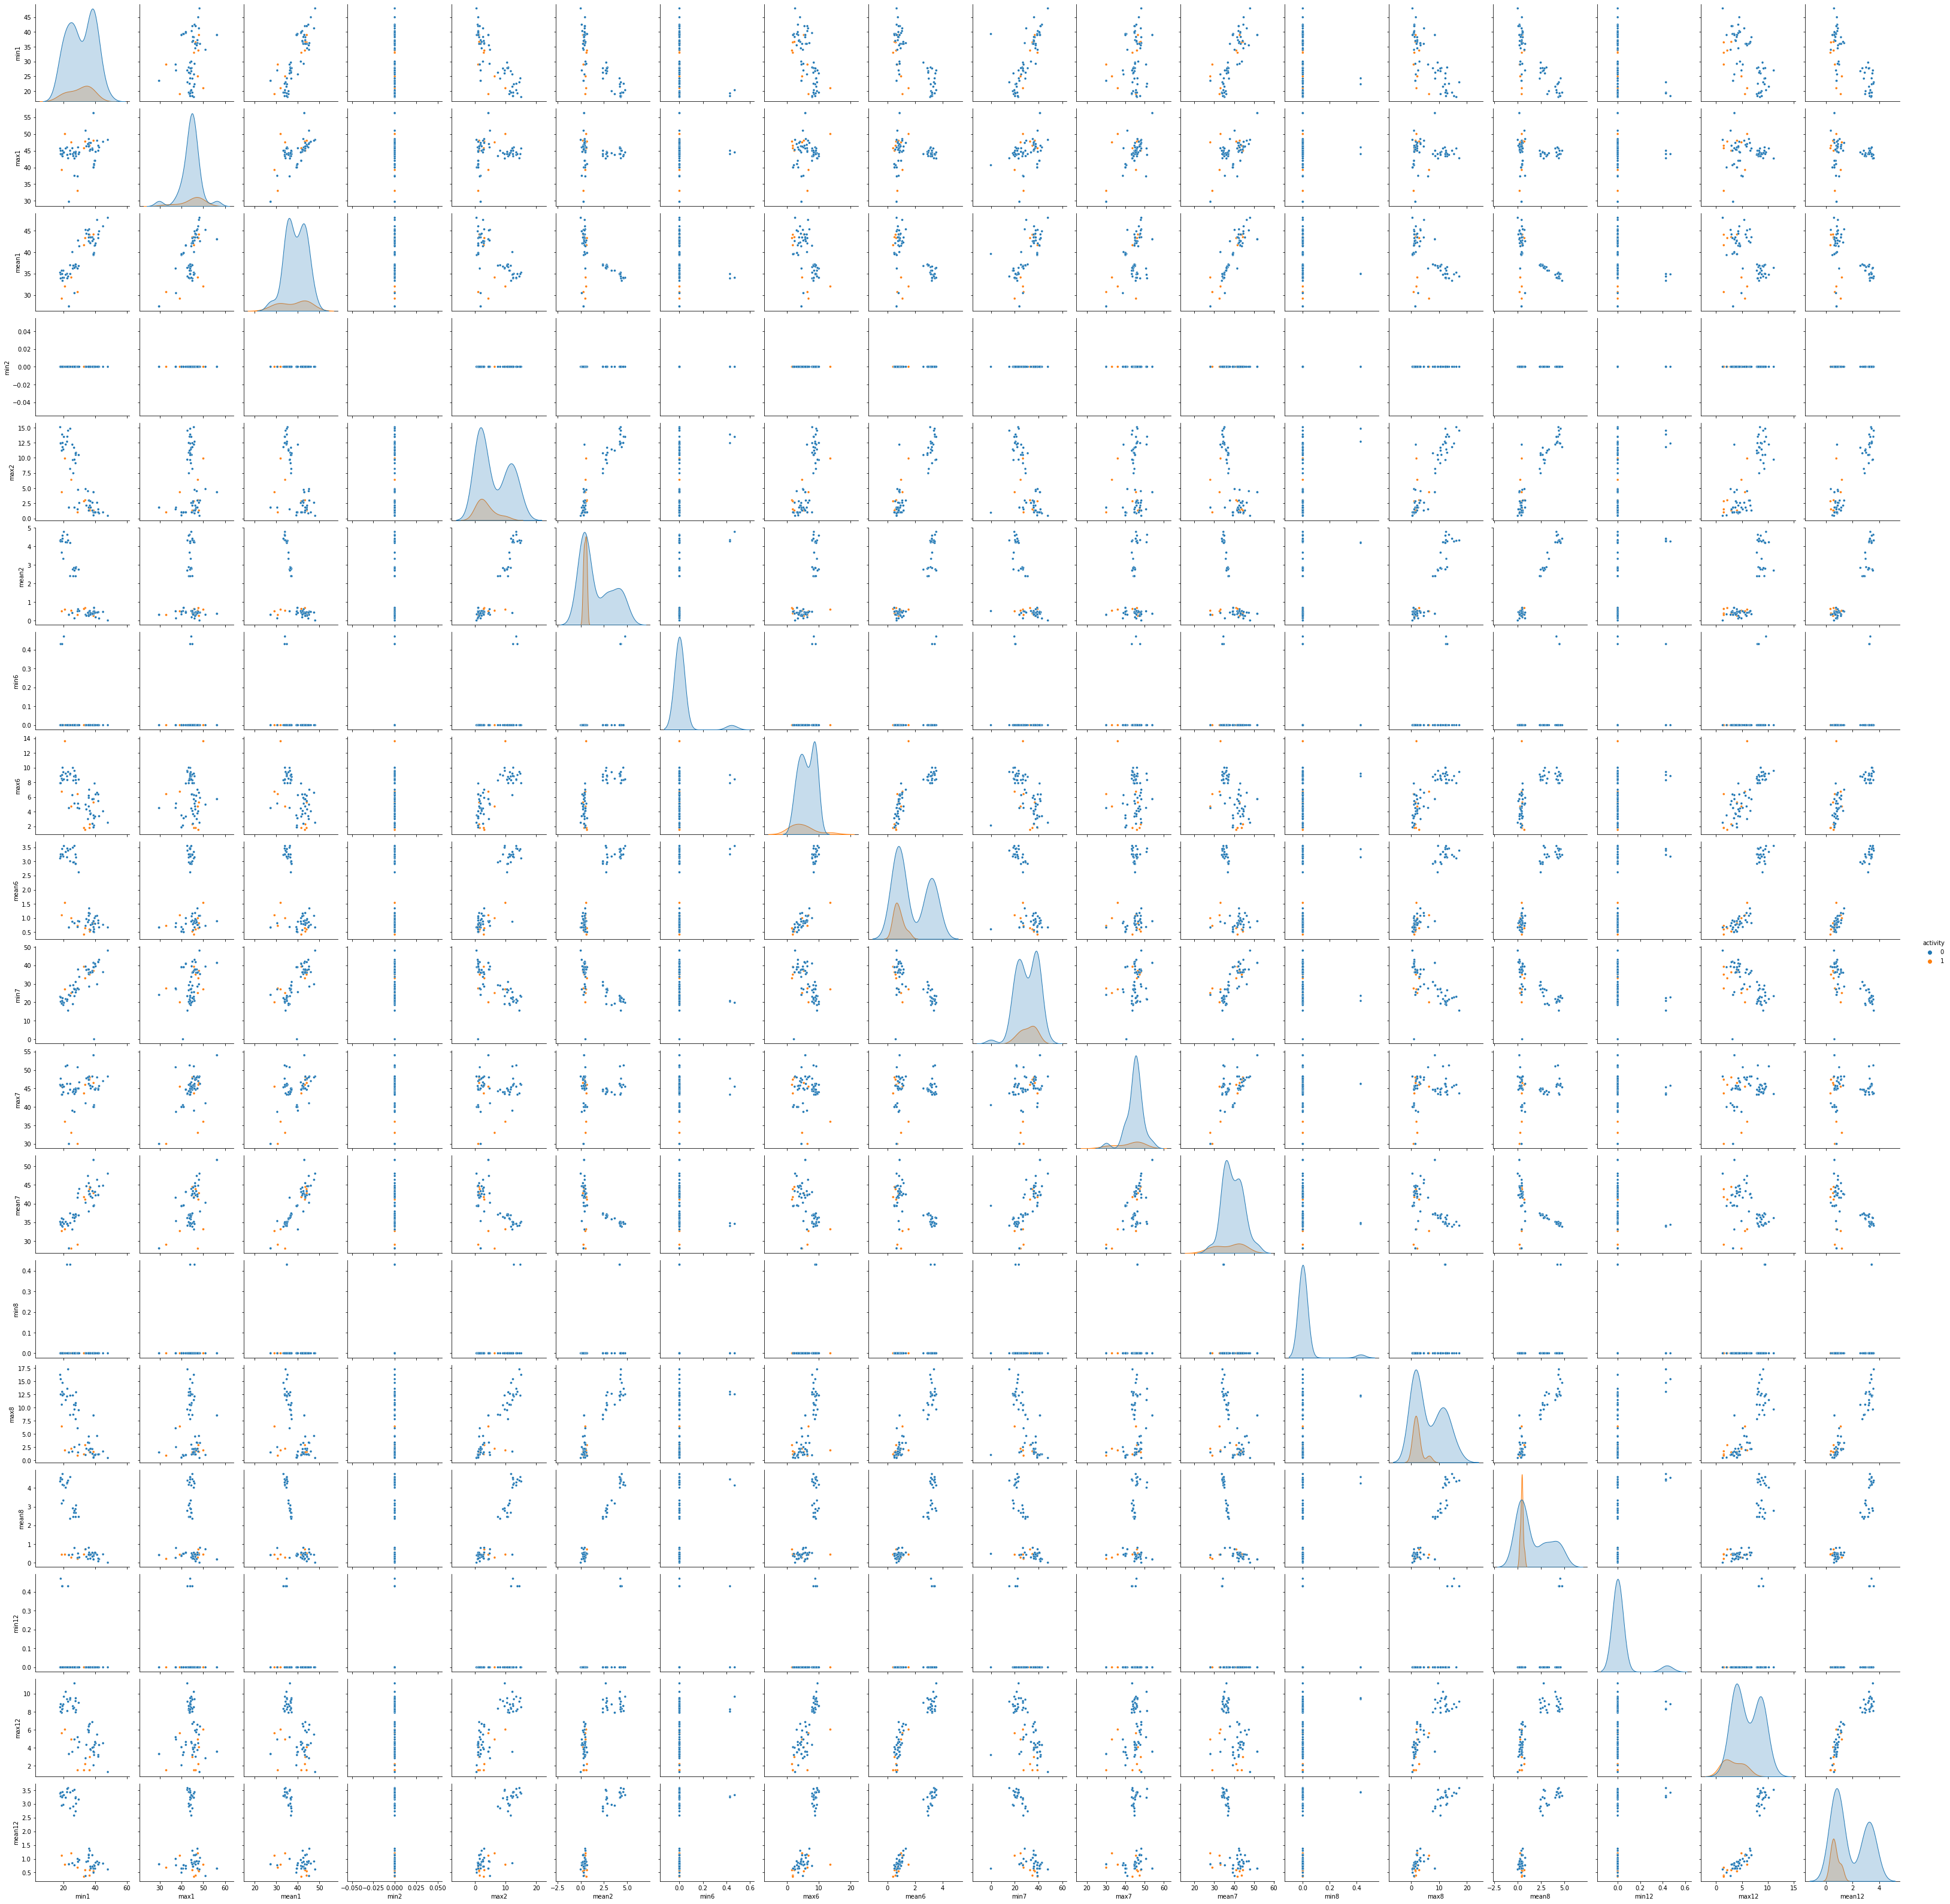

In [128]:
stat_4a2 = collections.defaultdict(list)
for datafile in trainset:
    col1 = datafile["avg_rss12"]
    col1_1st = col1[:240].describe()  # first 240 data
    col1_2nd = col1[240:].describe()  # second 240 data
    col2 = datafile['var_rss12']
    col2_1st = col2[:240].describe()  # first 240 data
    col2_2nd = col2[240:].describe()  # second 240 data
    col6 = datafile['var_rss23']
    col6_1st = col6[:240].describe()  # first 240 data
    col6_2nd = col6[240:].describe()  # second 240 data
    stat_4a2["min1"].append(col1_1st["min"])
    stat_4a2["max1"].append(col1_1st["max"])
    stat_4a2["mean1"].append(col1_1st["mean"])
    stat_4a2["min2"].append(col2_1st["min"])
    stat_4a2["max2"].append(col2_1st["max"])
    stat_4a2["mean2"].append(col2_1st["mean"])
    stat_4a2["min6"].append(col6_1st["min"])
    stat_4a2["max6"].append(col6_1st["max"])
    stat_4a2["mean6"].append(col6_1st["mean"])
    stat_4a2["min7"].append(col1_2nd["min"])
    stat_4a2["max7"].append(col1_2nd["max"])
    stat_4a2["mean7"].append(col1_2nd["mean"])
    stat_4a2["min8"].append(col2_2nd["min"])
    stat_4a2["max8"].append(col2_2nd["max"])
    stat_4a2["mean8"].append(col2_2nd["mean"])
    stat_4a2["min12"].append(col6_2nd["min"])
    stat_4a2["max12"].append(col6_2nd["max"])
    stat_4a2["mean12"].append(col6_2nd["mean"])
stat_4a2["activity"] = [1] * 9 + [0] * 60                               
df_4a2 = pd.DataFrame(stat_4a2)
graph_4a2 = sns.pairplot(df_4a2, hue='activity', plot_kws={'s':15})

I plotted 18*18 graphs above, with column number 1, 2, 6, 7, 8, 12. If we compare a i with the top left 9 graphs from aii, which are the columns for 1, 2, 6, we can see no considerable difference between them.

iii. Break each time series in your training set into l ∈ {1, 2, . . . , 20} time series of approximately equal length and use logistic regression5 to solve the binary classification problem, using time-domain features. Remember that breaking each of the time series does not change the number of instances. It only changes the number of features for each instance. Calculate the p-values for your logistic regression parameters in each model corresponding to each value of l and refit a logistic regression model using your pruned set of features.6 Alternatively, you can use backward selection using sklearn.feature selection or glm in R. Use 5-fold cross-validation to determine the best value of the pair (l, p), where p is the number of features used in recursive feature elimination. Explain what the right way and the wrong way are to perform cross-validation in this problem.7 Obviously, use the right way! Also, you may encounter the problem of class imbalance, which may make some of your folds not having any instances of the rare class. In such a case, you can use stratified cross validation. Research what it means and use it if needed.

In [129]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

# split file
highest = 0
y_train = [1] * 9 + [0] * 60
for l in range(1, 21):
    x_train = [] # always 69 files, just the features extended.
    file_size = 480 // l
    for datafile in trainset:
        extended_feature = []
        for i in range(1, l+1):
            for col in ['avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23', 'var_rss23']:
                chunk_data = datafile[col][(i-1) * file_size: i * file_size].describe()
                extended_feature.extend([chunk_data["min"], chunk_data["max"], chunk_data["mean"]])
        x_train.append(extended_feature)
    if l == 1:
        x_train_4a4 = x_train # for use in the next question
    
    model = LogisticRegression()
    rfecv = RFECV(estimator = model, step = 1, cv = StratifiedKFold(5), scoring = 'accuracy')
    rfecv.fit(np.array(x_train), np.array(y_train))
#     print(rfecv.support_ )
#     print(rfecv.ranking_)
#     print(rfecv.grid_scores_)
    accu = rfecv.grid_scores_[rfecv.n_features_ - 1]
    print('The highest accuracy for ' + str(i) + ' split is ' + str(accu))
    if accu > highest:
        highest = accu
        highest_l = l
        highest_f = rfecv.n_features_
        highest_features = [i for i, v in enumerate(rfecv.support_) if v == True ]
print(highest_l, highest_f)
print(highest_features)  

The highest accuracy for 1 split is 0.9857142857142858
The highest accuracy for 2 split is 0.9714285714285715
The highest accuracy for 3 split is 0.9714285714285715
The highest accuracy for 4 split is 0.9714285714285715
The highest accuracy for 5 split is 0.9560439560439562
The highest accuracy for 6 split is 0.9571428571428573
The highest accuracy for 7 split is 0.9857142857142858
The highest accuracy for 8 split is 0.9560439560439562
The highest accuracy for 9 split is 0.9571428571428573
The highest accuracy for 10 split is 0.9428571428571428
The highest accuracy for 11 split is 0.9571428571428573
The highest accuracy for 12 split is 0.9428571428571428
The highest accuracy for 13 split is 0.9714285714285715
The highest accuracy for 14 split is 0.9571428571428573
The highest accuracy for 15 split is 0.956043956043956
The highest accuracy for 16 split is 0.9571428571428573
The highest accuracy for 17 split is 0.9571428571428573
The highest accuracy for 18 split is 0.9714285714285715
Th

Right way is using RFECV method to perform cross-validation, which is much eaiser than using p-values method.

The above results are based on my own method to split data, and three features I chose min, max, and mean.

iv. Report the confusion matrix and show the ROC and AUC for your classifier on train data. Report the parameters of your logistic regression βi’s as well as the p-values associated with them.

-----------"Params"-------------
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.1456529458757686e-10
            Iterations: 38
            Function evaluations: 44
            Gradient evaluations: 38
2    -8.702727
8    -8.476638
12    6.275537
13    8.679103
14    9.103215
dtype: float64
-----------"P-values"-------------
2     0.999809
8     0.999607
12    0.999643
13    0.999792
14    0.999823
dtype: float64
-------"Confusion Matrix"---------
[[60  0]
 [ 0  9]]


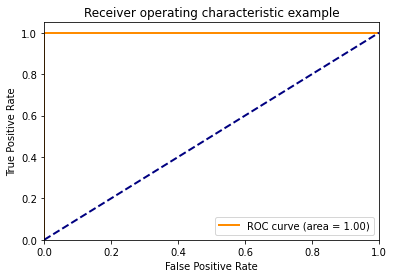

In [130]:
from sklearn import metrics

# when l = 1
x_train_new = pd.DataFrame(x_train_4a4).iloc[:, [2, 8, 12, 13, 14]]


from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn import model_selection
import matplotlib.pyplot as plt
import statsmodels.api as sm

# cal p-values
# Oridinary Learst Squares
ol = sm.OLS(x_train_new,np.array(y_train)).fit()
# Statsmodels
# print(ol.summary())
# print(ol.pvalues, '\n')

print("-----------\"Params\"-------------")
statLogitModel = sm.Logit(y_train, x_train_new).fit_regularized()
print(statLogitModel.params)
print("-----------\"P-values\"-------------")
print(statLogitModel.pvalues)

logreg = LogisticRegression()
# fit the model with data
logreg.fit(x_train_new,y_train)
yPredict = logreg.predict(x_train_new)
cnfMatrix = metrics.confusion_matrix(y_train, yPredict)
print("-------\"Confusion Matrix\"---------")
print(cnfMatrix)

y_score = logreg.fit(x_train_new, y_train).decision_function(x_train_new)

# Compute ROC curve and ROC area for each class
fpr,tpr,threshold = roc_curve(y_train, y_score) 
# cal AUC value
roc_auc = auc(fpr,tpr)
 
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

v. Test the classifier on the test set. Remember to break the time series in your test set into the same number of time series into which you broke your training set. Remember that the classifier has to be tested using the features extracted from the test set. Compare the accuracy on the test set with the cross-validation accuracy you obtained previously.

In [131]:
x_test = []
y_test = [1]*4+[0]*15
for i in range(69, 88):
    file_data = stat[i]
    x_test.append([file_data["mean1"], file_data["mean3"], file_data["min5"], file_data["max5"], file_data["mean5"]])
        
model = LogisticRegression()
# create the RFE model and select 3 attributes
rfe = RFECV(model, step = 1, cv = 5, scoring='accuracy')
rfe = rfe.fit(x_train_new, y_train)

train_clf_score = rfe.score(x_train_new, y_train)
test_clf_score = rfe.score(x_test, y_test)

print('train cross-validation score :', train_clf_score)
print('test cross-validation score :', test_clf_score)
print('\n')

train cross-validation score : 1.0
test cross-validation score : 0.9473684210526315




vi. Do your classes seem to be well-separated to cause instability in calculating logistic regression parameters?

Yes, classes are well-separated, cause instability.

vii. From the confusion matrices you obtained, do you see imbalanced classes? If yes, build a logistic regression model based on case-control sampling and adjust its parameters. Report the confusion matrix, ROC, and AUC of the model.

Parameters [[ 0.27837001  0.70042243 -0.67275894 -0.93744606 -0.58620992]]
matrix [[60  0]
 [ 0 60]]
AUC: 1.0


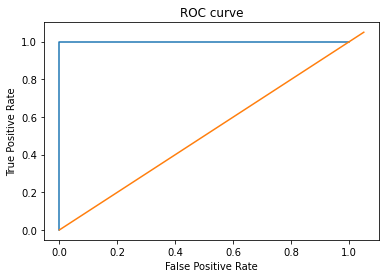

In [132]:
# reference: https://elitedatascience.com/imbalanced-classes
# oversample is a better idea than downsample

# from imblearn.over_sampling import RandomOverSampler
from sklearn.utils import resample
import scipy.stats as stats
from sklearn.utils import resample
from sklearn.metrics import roc_curve, auc, roc_auc_score

train_minority = stat_table[:9]
train_majority = stat_table[9:69] 
train_minority_upsampled = resample(train_minority, replace = True, n_samples = 60, random_state = 123) 
train_data_upsampled = pd.concat([train_majority, train_minority_upsampled])

train_data_X = np.array(train_data_upsampled[["mean1", "mean3", "min5", "max5", "mean5"]])
train_data_y = np.array([1] * 60 + [0] * 60)

logit_model = LogisticRegression()
logit_model.fit(train_data_X, train_data_y)
pre = logit_model.predict(train_data_X)
matrix = metrics.confusion_matrix(train_data_y, pre)
print('Parameters', logit_model.coef_)
print('matrix',matrix)
print('AUC:', roc_auc_score(train_data_y, pre))
fp, tp, thresholds = roc_curve(train_data_y, pre)
plt.plot(fp, tp)
plt.plot([0, 1.05], [0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

<b>(b) Binary Classification Using L1-penalized logistic regression</b>

i. Repeat 2(a)iii using L1-penalized logistic regression,8 i.e. instead of using p- values for variable selection, use L1 regularization. Note that in this problem, you have to cross-validate for both l, the number of time series into which you break each of your instances, and λ, the weight of L1 penalty in your logistic regression objective function (or C, the budget). Packages usually perform cross-validation for λ automatically.9

In [133]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler

highest = 0
y_train = [1] * 9 + [0] * 60
for l in range(1, 21):
    x_train = [] # always 69 files, just the features extended.
    file_size = 480 // l
    for datafile in trainset:
        extended_feature = []
        for i in range(1, l+1):
            for col in ['avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23', 'var_rss23']:
                chunk_data = datafile[col][(i-1) * file_size: i * file_size].describe()
                extended_feature.extend([chunk_data["min"], chunk_data["max"], chunk_data["mean"]])
        x_train.append(extended_feature)

    X = np.array(x_train)
    y = np.array(y_train)
    X = StandardScaler().fit_transform(X)
    model = LogisticRegressionCV(penalty = 'l1', cv = 5, n_jobs = -1, solver = 'liblinear')
    model.fit(X, y)
    accu = model.score(X, y)
    print('The accuracy for ' + str(i) + ' split is ' + str(accu))
    if accu > highest:
        highest = accu
        highest_l = l
print('Highest accuracy is', highest)
print('Best L is ', highest_l)

The accuracy for 1 split is 0.9855072463768116
The accuracy for 2 split is 0.9710144927536232
The accuracy for 3 split is 0.9710144927536232
The accuracy for 4 split is 0.9710144927536232
The accuracy for 5 split is 0.9710144927536232
The accuracy for 6 split is 0.9855072463768116
The accuracy for 7 split is 0.9855072463768116
The accuracy for 8 split is 0.9710144927536232
The accuracy for 9 split is 1.0
The accuracy for 10 split is 1.0
The accuracy for 11 split is 1.0
The accuracy for 12 split is 1.0
The accuracy for 13 split is 1.0
The accuracy for 14 split is 1.0
The accuracy for 15 split is 1.0
The accuracy for 16 split is 1.0
The accuracy for 17 split is 1.0
The accuracy for 18 split is 1.0
The accuracy for 19 split is 1.0
The accuracy for 20 split is 1.0
Highest accuracy is 1.0
Best L is  9


ii. Compare the L1-penalized with variable selection using p-values. Which one performs better? Which one is easier to implement?

L1-penalized is easier to implement and has a higher accuracy than variable selection using p-values. The run time is also shorter.

<b> (c) Multi-class Classification (The Realistic Case)</b>

i. Find the best l in the same way as you found it in 2(b)i to build an L1- penalized multinomial regression model to classify all activities in your train- ing set.10 Report your test error. Research how confusion matrices and ROC curves are defined for multiclass classification and show them for this problem if possible.11

In [134]:
highest = 0
y_train = [0] * 5 + [1] * 4 + [2] * 12 + [3] * 12 + [4] * 12 + [5] * 12 + [6] * 12
y_test = [0] * 2 + [1] * 2 + [2] * 3 + [3] * 3 + [4] * 3 + [5] * 3 + [6] * 3
for l in range(1, 21):
    x_train = [] # always 69 files, just the features extended.
    file_size = 480 // l
    for datafile in trainset:
        extended_feature = []
        for i in range(1, l+1):
            for col in ['avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23', 'var_rss23']:
                chunk_data = datafile[col][(i-1) * file_size: i * file_size].describe()
                extended_feature.extend([chunk_data["min"], chunk_data["max"], chunk_data["mean"]])
        x_train.append(extended_feature)
    x_test = []
    for datafile in testset:
        extended_feature = []
        for i in range(1, l+1):
            for col in ['avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23', 'var_rss23']:
                chunk_data = datafile[col][(i-1) * file_size: i * file_size].describe()
                extended_feature.extend([chunk_data["min"], chunk_data["max"], chunk_data["mean"]])
        x_test.append(extended_feature)
    if l == 7: # store for next question
        x_train_c1 = x_train
        x_test_c1 = x_test
        
    x_test = np.array(x_test)
    x_train = np.array(x_train)
    x_train = StandardScaler().fit_transform(x_train)
    x_test = StandardScaler().fit_transform(x_test)
    model = LogisticRegressionCV(penalty = 'l1', cv = 5, n_jobs = -1, solver = 'liblinear')
    model.fit(x_train, y_train)
    accu = model.score(x_test, y_test)
    print('The test error for ' + str(i) + ' split is ' + str(1 - accu))
    if accu > highest:
        highest = accu
        highest_l = l
print('Highest accuracy is', highest)
print('Best L is ', highest_l)

/Users/aurorawong/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/aurorawong/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


The test error for 1 split is 0.21052631578947367
The test error for 2 split is 0.3157894736842105
The test error for 3 split is 0.26315789473684215
The test error for 4 split is 0.26315789473684215
The test error for 5 split is 0.21052631578947367
The test error for 6 split is 0.21052631578947367
The test error for 7 split is 0.1578947368421053
The test error for 8 split is 0.368421052631579
The test error for 9 split is 0.26315789473684215
The test error for 10 split is 0.26315789473684215
The test error for 11 split is 0.3157894736842105
The test error for 12 split is 0.26315789473684215
The test error for 13 split is 0.3157894736842105
The test error for 14 split is 0.10526315789473684
The test error for 15 split is 0.42105263157894735
The test error for 16 split is 0.3157894736842105
The test error for 17 split is 0.368421052631579
The test error for 18 split is 0.10526315789473684
The test error for 19 split is 0.368421052631579
The test error for 20 split is 0.26315789473684215


confusion matrix
 [[2 0 0 0 0 0]
 [1 0 1 0 0 0]
 [0 0 3 0 0 0]
 [0 0 0 3 0 0]
 [0 0 0 0 2 1]
 [0 0 0 1 0 2]]


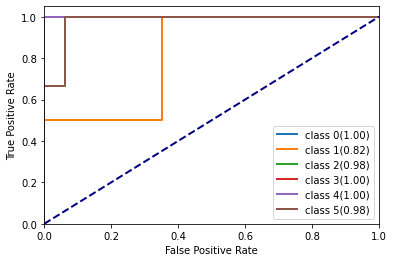

In [135]:
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
# select L = 7
model = LogisticRegressionCV(penalty = 'l1', solver='saga', cv=5, multi_class='multinomial', scoring = 'accuracy').fit(x_train_c1, y_train)
yTestPredict = model.predict(x_test_c1)

cnfMatrix = metrics.confusion_matrix(y_test, yTestPredict, labels=[0,1,2,3,4,5])
print('confusion matrix\n', cnfMatrix)

# draw ROC
y_scores = model.predict_log_proba(x_test_c1)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(6):
    fpr[i], tpr[i],_ = roc_curve(y_test, y_scores[:, i],pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
for i in range(6):
    plt.plot(fpr[i],tpr[i],lw=lw,label=f'class {i}(%0.2f)'%roc_auc[i])

    
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

ii. Repeat 2(c)i using a Na ̈ıve Bayes’ classifier. Use both Gaussian and Multi- nomial priors and compare the results.

In [136]:
# Gaussian
from sklearn.naive_bayes import GaussianNB
highest = 0
y_train = [0] * 5 + [1] * 4 + [2] * 12 + [3] * 12 + [4] * 12 + [5] * 12 + [6] * 12
y_test = [0] * 2 + [1] * 2 + [2] * 3 + [3] * 3 + [4] * 3 + [5] * 3 + [6] * 3
for l in range(1, 21):
    x_train = [] # always 69 files, just the features extended.
    file_size = 480 // l
    for datafile in trainset:
        extended_feature = []
        for i in range(1, l+1):
            for col in ['avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23', 'var_rss23']:
                chunk_data = datafile[col][(i-1) * file_size: i * file_size].describe()
                extended_feature.extend([chunk_data["min"], chunk_data["max"], chunk_data["mean"]])
        x_train.append(extended_feature)
    x_test = []
    for datafile in testset:
        extended_feature = []
        for i in range(1, l+1):
            for col in ['avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23', 'var_rss23']:
                chunk_data = datafile[col][(i-1) * file_size: i * file_size].describe()
                extended_feature.extend([chunk_data["min"], chunk_data["max"], chunk_data["mean"]])
        x_test.append(extended_feature)

    x_test = np.array(x_test)
    x_train = np.array(x_train)
    x_train = StandardScaler().fit_transform(x_train)
    x_test = StandardScaler().fit_transform(x_test)
    
    if l == 8: # for ROC and matrix
        x_train_gaussian = x_train
        x_test_gaussian = x_test
        
    model = GaussianNB()
    model.fit(x_train, y_train)
    accu = model.score(x_test, y_test)
    print('The test error for ' + str(i) + ' split is ' + str(1 - accu))
    if accu > highest:
        highest = accu
        highest_l = l
print('Highest accuracy is', highest)
print('Best L is ', highest_l)

The test error for 1 split is 0.8421052631578947
The test error for 2 split is 0.8421052631578947
The test error for 3 split is 0.8421052631578947
The test error for 4 split is 0.8421052631578947
The test error for 5 split is 0.8421052631578947
The test error for 6 split is 0.8421052631578947
The test error for 7 split is 0.8421052631578947
The test error for 8 split is 0.6842105263157895
The test error for 9 split is 0.6842105263157895
The test error for 10 split is 0.8421052631578947
The test error for 11 split is 0.6842105263157895
The test error for 12 split is 0.6842105263157895
The test error for 13 split is 0.6842105263157895
The test error for 14 split is 0.6842105263157895
The test error for 15 split is 0.6842105263157895
The test error for 16 split is 0.6842105263157895
The test error for 17 split is 0.6842105263157895
The test error for 18 split is 0.6842105263157895
The test error for 19 split is 0.6842105263157895
The test error for 20 split is 0.6842105263157895
Highest a

confusion matrix
 [[0 0 2 0 0 0]
 [0 0 2 0 0 0]
 [0 0 3 0 0 0]
 [0 0 3 0 0 0]
 [0 0 3 0 0 0]
 [0 0 3 0 0 0]]


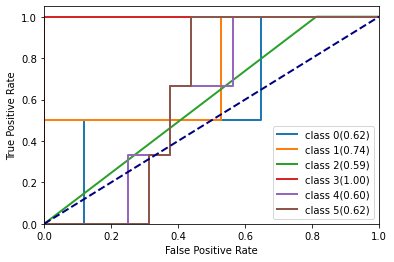

In [137]:
# select L=8
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.model_selection import cross_val_score

model = GaussianNB()
model.fit(x_train_gaussian, y_train)
yTestPredict = model.predict(x_test_gaussian)

cnfMatrix = metrics.confusion_matrix(y_test, yTestPredict, labels=[0,1,2,3,4,5])
print('confusion matrix\n', cnfMatrix)

# draw ROC
y_scores = model.predict_log_proba(x_test_gaussian)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(6):
    fpr[i], tpr[i],_ = roc_curve(y_test, y_scores[:, i],pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
for i in range(6):
    plt.plot(fpr[i],tpr[i],lw=lw,label=f'class {i}(%0.2f)'%roc_auc[i])

    
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Multinomial
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler

highest = 0
y_train = [0] * 5 + [1] * 4 + [2] * 12 + [3] * 12 + [4] * 12 + [5] * 12 + [6] * 12
y_test = [0] * 2 + [1] * 2 + [2] * 3 + [3] * 3 + [4] * 3 + [5] * 3 + [6] * 3
for l in range(1, 21):
    x_train = [] # always 69 files, just the features extended.
    file_size = 480 // l
    for datafile in trainset:
        extended_feature = []
        for i in range(1, l+1):
            for col in ['avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23', 'var_rss23']:
                chunk_data = datafile[col][(i-1) * file_size: i * file_size].describe()
                extended_feature.extend([chunk_data["min"], chunk_data["max"], chunk_data["mean"]])
        x_train.append(extended_feature)
    x_test = []
    for datafile in testset:
        extended_feature = []
        for i in range(1, l+1):
            for col in ['avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23', 'var_rss23']:
                chunk_data = datafile[col][(i-1) * file_size: i * file_size].describe()
                extended_feature.extend([chunk_data["min"], chunk_data["max"], chunk_data["mean"]])
        x_test.append(extended_feature)

    x_test = np.array(x_test)
    x_train = np.array(x_train)
    x_train = MinMaxScaler().fit_transform(x_train) # use MinMaxScaler, otherwise negative values.
    x_test = MinMaxScaler().fit_transform(x_test)
    
    if l == 17: # for ROC and matrix
        x_train_multinomial = x_train
        x_test_multinomial = x_test
        
    model = MultinomialNB()
    model.fit(x_train, y_train)

    accu = model.score(x_test, y_test)
    print('The test error for ' + str(i) + ' split is ' + str(1 - accu))
    if accu > highest:
        highest = accu
        highest_l = l
print('Highest accuracy is', highest)
print('Best L is ', highest_l)

The test error for 1 split is 0.26315789473684215
The test error for 2 split is 0.368421052631579
The test error for 3 split is 0.26315789473684215
The test error for 4 split is 0.3157894736842105
The test error for 5 split is 0.3157894736842105
The test error for 6 split is 0.26315789473684215
The test error for 7 split is 0.3157894736842105
The test error for 8 split is 0.3157894736842105
The test error for 9 split is 0.26315789473684215
The test error for 10 split is 0.3157894736842105
The test error for 11 split is 0.3157894736842105
The test error for 12 split is 0.26315789473684215
The test error for 13 split is 0.3157894736842105
The test error for 14 split is 0.26315789473684215
The test error for 15 split is 0.26315789473684215
The test error for 16 split is 0.26315789473684215
The test error for 17 split is 0.21052631578947367


In [ ]:
# select L=17
model = MultinomialNB()
model.fit(x_train_multinomial, y_train)
yTestPredict = model.predict(x_test_multinomial)

cnfMatrix = metrics.confusion_matrix(y_test, yTestPredict, labels=[0,1,2,3,4,5])
print('confusion matrix\n', cnfMatrix)

# draw ROC
y_scores = model.predict_log_proba(x_test_multinomial)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(6):
    fpr[i], tpr[i],_ = roc_curve(y_test, y_scores[:, i],pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
for i in range(6):
    plt.plot(fpr[i],tpr[i],lw=lw,label=f'class {i}(%0.2f)'%roc_auc[i])

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

iii. Which method is better for multi-class classification in this problem?

Multinomial regression model is better, since the average of score I got from multinomial Naive Bayes is higher than the Gaussian's.

<b> 3. ISLR, 4.8.3</b>

This problem relates to the QDA model, in which the observations within each class are drawn from a normal distribution with a class- specific mean vector and a class specific covariance matrix. We con- sider the simple case where p = 1; i.e. there is only one feature.
Suppose that we have K classes, and that if an observation belongs to the kth class then X comes from a one-dimensional normal dis- tribution, X ∼ N(μk,σk2). Recall that the density function for the one-dimensional normal distribution is given in (4.16). Prove that in this case, the Bayes classifier is not linear. Argue that it is in fact quadratic.
Hint: For this problem, you should follow the arguments laid out in Section 4.4.1, but without making the assumption that σ12 = . . . = σK2 .

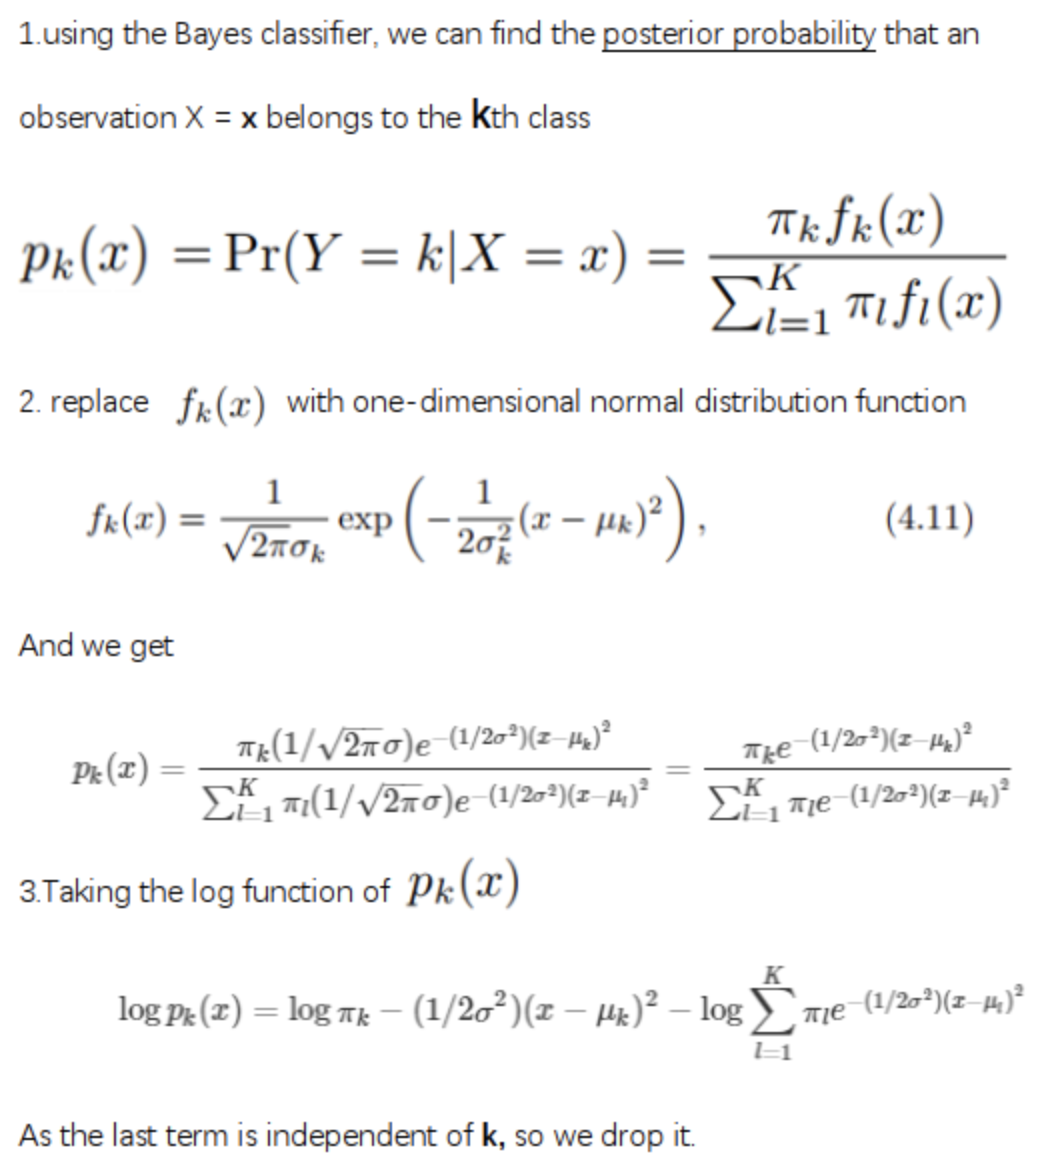

In [ ]:
from IPython.display import Latex
Latex(r"$logπ_k-(1/2σ^2_k)(x−μ_k)^2 = -\frac {1}{2σ^2_k}x^2 + \frac {μ_k}{σ^2_k}x - \frac {u^2_k}{2σ^2_k} - logσ_k + logπ_k$")

The above expression is not linear, it is quadratic.

<b>4. ISLR 4.8.7</b>

Suppose that we wish to predict whether a given stock will issue a dividend this year (“Yes” or “No”) based on X, last year’s percent profit. We examine a large number of companies and discover that the mean value of X for companies that issued a dividend was X ̄ = 10, while the mean for those that didn’t was X ̄ = 0. In addition, the variance of X for these two sets of companies was σˆ2 = 36. Finally, 80 % of companies issued dividends. Assuming that X follows a nor- mal distribution, predict the probability that a company will issue a dividend this year given that its percentage profit was X = 4 last year.
Hint: Recall that the density function for a normal random variable is f(x) = √ 1 e−(x−μ)2/2σ2 . You will need to use Bayes’ theorem.

based on what the question said, we have two classes, so k = 2. πk = 0.8, μρ = 10, σ^2 = 36:

In [ ]:
Latex(r"$p_1(4) = \frac {0.8e^{-(1/72)(4-10)^2}}{0.8e^{-(1/72)(4-10)^2}+0.2e^{-(1/72)(4-0)^2}} = 0.752$")

the probability is 0.752 when the percentage return was X = 4